In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

In [2]:
df = pd.DataFrame({
    'contract no':np.random.randint(111111,999999,(10000)),
    'stock_symbol':np.random.choice([''.join(np.random.choice(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'),5)) for i in range(20)],10000),
    'buyer_broker':np.random.randint(1,20,10000),
    'seller_broker':np.random.randint(1,20,10000),
    'quantity':np.random.randint(50,1000,10000),
    'rate':np.random.randint(100,10000,10000),
    'date':[f"20{k}-{i}-{j}" for k in range(10,50) for i in range(1,11) for j in range(1,29)][:10000]
}).reset_index().rename(columns={'index':'sn'})

In [3]:
df

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date
0,0,210578,VUSZG,15,3,385,5008,2010-1-1
1,1,496960,MTSSP,12,15,77,8808,2010-1-2
2,2,762187,KHBJX,17,16,395,5830,2010-1-3
3,3,914444,MTSSP,7,9,986,5586,2010-1-4
4,4,293743,DSOFE,10,11,423,9861,2010-1-5
...,...,...,...,...,...,...,...,...
9995,9995,510039,FIKDR,15,15,409,7080,2045-7-28
9996,9996,304107,TVDTA,8,10,411,3810,2045-8-1
9997,9997,823779,EMDEC,2,6,502,131,2045-8-2
9998,9998,166075,EFWMW,1,5,962,1568,2045-8-3


In [4]:
df["amount"] = df["quantity"]* df["rate"]
df['date']=pd.to_datetime(df['date'])

In [5]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,210578,VUSZG,15,3,385,5008,2010-01-01,1928080
1,1,496960,MTSSP,12,15,77,8808,2010-01-02,678216
2,2,762187,KHBJX,17,16,395,5830,2010-01-03,2302850
3,3,914444,MTSSP,7,9,986,5586,2010-01-04,5507796
4,4,293743,DSOFE,10,11,423,9861,2010-01-05,4171203


In [6]:
df.tail()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
9995,9995,510039,FIKDR,15,15,409,7080,2045-07-28,2895720
9996,9996,304107,TVDTA,8,10,411,3810,2045-08-01,1565910
9997,9997,823779,EMDEC,2,6,502,131,2045-08-02,65762
9998,9998,166075,EFWMW,1,5,962,1568,2045-08-03,1508416
9999,9999,938561,PMXDX,1,2,134,4429,2045-08-04,593486


# Single Broker Details

In [7]:
df[df['buyer_broker']==1].head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
32,32,396390,CROOV,1,14,211,7436,2010-02-05,1568996
64,64,983131,XOAJJ,1,5,383,2911,2010-03-09,1114913
69,69,507433,MTSSP,1,1,146,5567,2010-03-14,812782
74,74,133630,VGMKV,1,13,527,2725,2010-03-19,1436075
105,105,654607,MADBK,1,15,634,8962,2010-04-22,5681908
154,154,654430,EFWMW,1,18,559,1710,2010-06-15,955890
168,168,534982,MTSSP,1,3,839,1129,2010-07-01,947231
171,171,821599,PMXDX,1,12,733,2848,2010-07-04,2087584
201,201,740926,PMXDX,1,7,463,8635,2010-08-06,3998005
202,202,764360,VUSZG,1,12,536,5813,2010-08-07,3115768


In [8]:
df[df['buyer_broker']==2].head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
7,7,687070,KHBJX,2,5,264,8990,2010-01-08,2373360
17,17,111706,FIKDR,2,8,940,7343,2010-01-18,6902420
22,22,383919,PVWPV,2,5,327,9647,2010-01-23,3154569
31,31,147553,MTSSP,2,12,392,9504,2010-02-04,3725568
33,33,328618,XOAJJ,2,15,861,6393,2010-02-06,5504373
68,68,827976,EFWMW,2,7,450,6739,2010-03-13,3032550
79,79,837430,VGMKV,2,18,824,4721,2010-03-24,3890104
99,99,786751,EFWMW,2,10,807,5389,2010-04-16,4348923
109,109,896044,MTSSP,2,5,634,5305,2010-04-26,3363370
121,121,713507,CROOV,2,1,720,6455,2010-05-10,4647600


# data between date ranges

In [9]:
year_range = df[(df['date']>'2010-01-04')&(df['date']<'2011-01-04')]
year_range.head(10)

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
4,4,293743,DSOFE,10,11,423,9861,2010-01-05,4171203
5,5,660688,DSOFE,16,5,146,138,2010-01-06,20148
6,6,143952,VGMKV,10,19,342,9093,2010-01-07,3109806
7,7,687070,KHBJX,2,5,264,8990,2010-01-08,2373360
8,8,266615,KHBJX,6,3,923,5648,2010-01-09,5213104
9,9,486144,EMDEC,7,10,519,7366,2010-01-10,3822954
10,10,580485,CROOV,5,19,804,9632,2010-01-11,7744128
11,11,653466,VGMKV,12,13,905,2922,2010-01-12,2644410
12,12,277568,EFWMW,17,14,685,5045,2010-01-13,3455825
13,13,174928,EFWMW,12,4,250,6961,2010-01-14,1740250


In [10]:
year_range.groupby(["buyer_broker"])["quantity"].sum().sort_values(ascending= False)

buyer_broker
2     13644
4     12530
3     11719
5     10100
10     9153
12     8124
18     7831
11     7818
16     7806
19     7769
1      7725
7      7166
15     7133
9      7049
17     6573
13     5269
6      5223
14     4036
8      2394
Name: quantity, dtype: int32

### Broker 17 was max stock buyer

In [11]:
year_range.groupby(["seller_broker"])["quantity"].sum().sort_values(ascending= False)

seller_broker
5     13989
12    13807
1     10190
13     9306
4      9282
10     8603
3      8415
9      7643
18     7455
7      7073
15     6948
19     6829
17     6504
2      6260
11     6254
16     6030
8      5827
14     4909
6      3738
Name: quantity, dtype: int32

### broker 5 was most stock seller

# Top buyer broker

In [12]:
df.groupby(["buyer_broker"])["amount"].sum().sort_values(ascending= False)

buyer_broker
13    1617691417
5     1522815448
3     1456143007
1     1429903267
10    1421788888
12    1414573467
9     1404573272
11    1398259821
15    1392292188
6     1390404206
2     1373159215
16    1360358455
4     1347895441
14    1337806202
19    1318786090
7     1293905855
17    1276586544
18    1272827173
8     1227111021
Name: amount, dtype: int32

# top seller broker

In [13]:
df.groupby(["seller_broker"])["amount"].sum().sort_values(ascending= False)

seller_broker
5     1502991641
17    1486038033
8     1472269342
2     1470870267
19    1432197463
4     1422141775
3     1402056281
9     1383328431
7     1374077002
12    1372499206
15    1368387289
14    1359181628
1     1351175117
10    1350526036
6     1341995807
13    1340426746
18    1336578980
16    1256610809
11    1233529124
Name: amount, dtype: int32

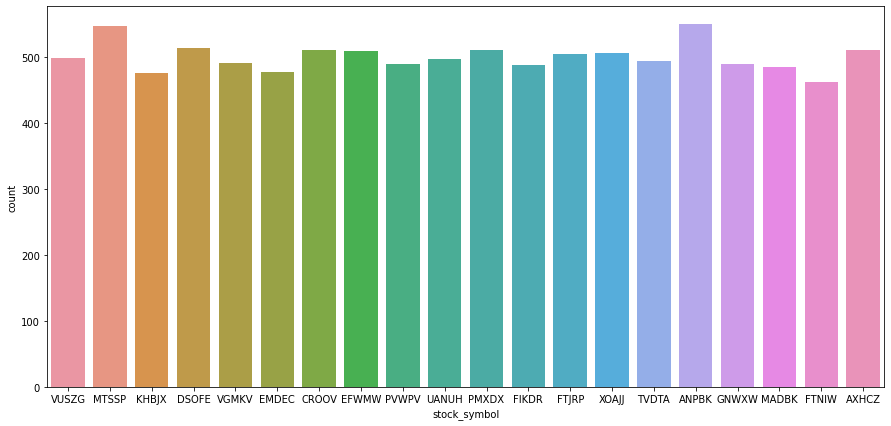

In [14]:
pl.figure(figsize=(15,7))
sns.countplot(x=df['stock_symbol'])
pl.show()

In [15]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,210578,VUSZG,15,3,385,5008,2010-01-01,1928080
1,1,496960,MTSSP,12,15,77,8808,2010-01-02,678216
2,2,762187,KHBJX,17,16,395,5830,2010-01-03,2302850
3,3,914444,MTSSP,7,9,986,5586,2010-01-04,5507796
4,4,293743,DSOFE,10,11,423,9861,2010-01-05,4171203


In [16]:
df.shape

(10000, 9)

In [17]:
df_buyer_= df[df['buyer_broker']>df['seller_broker']]
df_buyer_.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,210578,VUSZG,15,3,385,5008,2010-01-01,1928080
2,2,762187,KHBJX,17,16,395,5830,2010-01-03,2302850
5,5,660688,DSOFE,16,5,146,138,2010-01-06,20148
8,8,266615,KHBJX,6,3,923,5648,2010-01-09,5213104
12,12,277568,EFWMW,17,14,685,5045,2010-01-13,3455825


# Top turnover

In [18]:
df_buyer_.groupby(['stock_symbol'])['amount'].sum().sort_values(ascending=False)

stock_symbol
ANPBK    695597137
XOAJJ    693725740
UANUH    673691036
VUSZG    662391470
CROOV    652781548
DSOFE    647302810
TVDTA    641858230
MTSSP    635944139
KHBJX    618714589
FTJRP    609295008
FTNIW    600163426
PVWPV    593052074
EMDEC    589371863
VGMKV    582487440
AXHCZ    581583372
MADBK    561983703
PMXDX    554837525
GNWXW    549793038
FIKDR    541344006
EFWMW    508328684
Name: amount, dtype: int32

In [19]:
df_seller_= df[df['seller_broker']>df['buyer_broker']]
df_seller_.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
1,1,496960,MTSSP,12,15,77,8808,2010-01-02,678216
3,3,914444,MTSSP,7,9,986,5586,2010-01-04,5507796
4,4,293743,DSOFE,10,11,423,9861,2010-01-05,4171203
6,6,143952,VGMKV,10,19,342,9093,2010-01-07,3109806
7,7,687070,KHBJX,2,5,264,8990,2010-01-08,2373360


In [20]:
df_seller_.groupby(['stock_symbol'])['amount'].sum().sort_values(ascending=False)

stock_symbol
MTSSP    727759634
EFWMW    720097021
XOAJJ    715322430
CROOV    693993629
PMXDX    691746081
GNWXW    654512244
DSOFE    642827905
VGMKV    636625615
PVWPV    628162611
TVDTA    623964629
AXHCZ    615116344
ANPBK    609802408
FTJRP    608477251
VUSZG    601260019
FIKDR    569697628
EMDEC    561181766
KHBJX    558055801
UANUH    555104995
MADBK    542397479
FTNIW    542046621
Name: amount, dtype: int32

In [21]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,210578,VUSZG,15,3,385,5008,2010-01-01,1928080
1,1,496960,MTSSP,12,15,77,8808,2010-01-02,678216
2,2,762187,KHBJX,17,16,395,5830,2010-01-03,2302850
3,3,914444,MTSSP,7,9,986,5586,2010-01-04,5507796
4,4,293743,DSOFE,10,11,423,9861,2010-01-05,4171203


# Top buyer broker

In [22]:
df.groupby('buyer_broker')['quantity'].sum().sort_values(ascending=False)

buyer_broker
13    319269
3     297081
1     287513
5     286837
6     280912
12    279588
9     278307
15    276959
11    275872
2     274840
14    270918
10    270749
16    270020
19    269294
4     258907
7     257969
17    256659
18    251374
8     245578
Name: quantity, dtype: int32

# topseller broker

In [23]:
df.groupby('seller_broker')['quantity'].sum().sort_values(ascending=False)

seller_broker
8     290991
17    287605
3     285833
10    284320
5     282470
19    282375
2     277306
7     276831
4     274381
13    273339
1     273207
14    272589
15    271988
18    270569
9     269841
6     265526
16    262012
12    258738
11    248725
Name: quantity, dtype: int32

In [24]:
df.head()

,sn,contract no,stock_symbol,buyer_broker,seller_broker,quantity,rate,date,amount
0,0,210578,VUSZG,15,3,385,5008,2010-01-01,1928080
1,1,496960,MTSSP,12,15,77,8808,2010-01-02,678216
2,2,762187,KHBJX,17,16,395,5830,2010-01-03,2302850
3,3,914444,MTSSP,7,9,986,5586,2010-01-04,5507796
4,4,293743,DSOFE,10,11,423,9861,2010-01-05,4171203


In [25]:
grouped = df.groupby(['buyer_broker','stock_symbol'])['quantity'].sum().reset_index()
grouped.head()

,buyer_broker,stock_symbol,quantity
0,1,ANPBK,15224
1,1,AXHCZ,12859
2,1,CROOV,14838
3,1,DSOFE,20072
4,1,EFWMW,17344


In [26]:
temp_df = pd.DataFrame()
for i in np.unique(grouped['stock_symbol']):
    temp=pd.DataFrame(grouped[grouped['stock_symbol']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)

## Top bought companies - High buying quantity of company stock (Single company)


In [27]:
temp_df

,buyer_broker,stock_symbol,quantity
0,3,EFWMW,22654
1,7,AXHCZ,22542
2,5,VUSZG,22173
3,13,FIKDR,22035
4,11,FTNIW,21513
5,5,TVDTA,21454
6,9,PMXDX,21438
7,13,EMDEC,21296
8,13,FTJRP,21251
9,13,XOAJJ,20459


## Top bought companies - High selling quantity of company stock (Single company)

In [28]:
grouped = df.groupby(['stock_symbol','seller_broker',])['quantity'].sum().reset_index()
temp_df = pd.DataFrame()
for i in np.unique(grouped['stock_symbol']):
    temp=pd.DataFrame(grouped[grouped['stock_symbol']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)

In [29]:
temp_df

,stock_symbol,seller_broker,quantity
0,PMXDX,14,27201
1,XOAJJ,10,22295
2,TVDTA,11,21924
3,DSOFE,1,21692
4,ANPBK,10,21519
5,AXHCZ,17,21518
6,VUSZG,8,21360
7,MTSSP,18,21139
8,PVWPV,3,20364
9,FIKDR,14,20344


In [30]:
pivot = pd.pivot_table(data = df,
              columns="stock_symbol",
               index = "buyer_broker",
               values = "quantity",
               aggfunc= "sum"
              )


In [31]:
grouped = df.groupby(['seller_broker','stock_symbol'])['quantity'].sum().reset_index()
temp_df = pd.DataFrame()
for i in np.unique(grouped['seller_broker']):
    temp=pd.DataFrame(grouped[grouped['seller_broker']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)

# Top broker top sell

In [32]:
temp_df

,seller_broker,stock_symbol,quantity
0,14,PMXDX,27201
1,10,XOAJJ,22295
2,11,TVDTA,21924
3,1,DSOFE,21692
4,17,AXHCZ,21518
5,8,VUSZG,21360
6,18,MTSSP,21139
7,3,DSOFE,20609
8,5,VUSZG,20478
9,2,TVDTA,19983


In [33]:
grouped = df.groupby(['buyer_broker','stock_symbol'])['quantity'].sum().reset_index()
temp_df = pd.DataFrame()
for i in np.unique(grouped['buyer_broker']):
    temp=pd.DataFrame(grouped[grouped['buyer_broker']==i].sort_values('quantity',ascending=False).reset_index(drop=True).loc[0]).T
    temp_df = pd.concat([temp_df,temp]).sort_values('quantity',ascending=False).reset_index(drop = True)


# TOP broker top buy

In [34]:
temp_df

,buyer_broker,stock_symbol,quantity
0,3,EFWMW,22654
1,7,AXHCZ,22542
2,5,VUSZG,22173
3,13,FIKDR,22035
4,11,FTNIW,21513
5,9,PMXDX,21438
6,6,PMXDX,21026
7,1,DSOFE,20072
8,10,PMXDX,19921
9,4,CROOV,19296
